In [14]:
# import thư viện

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

In [15]:
X=np.array(([0,0],
              [0,1],
               [1,0],
                [1,1]), dtype=float)
y=np.array(([0],
              [1],
               [1],
                [0]), dtype=float)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Xây dựng ANN và huấn luyện

# khởi tạo mô hình Sequential
classifier = Sequential()

# Thêm lớp Input với kích thước đầu vào là ...
classifier.add(Input(shape=(2,)))

# Thêm lớp Dense đầu tiên với ... nút
classifier.add(Dense(2, activation='sigmoid'))

# Thêm lớp Dense đầu tiên với ... nút
classifier.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50, verbose=0)

In [21]:
# Hiển thị độ chính xác mô hình
loss, accuracy = classifier.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.67


In [22]:
y_pred = classifier.predict(X_test)
print(y_pred.shape)

1/1 [==============================] - 0s 53ms/step
(1, 1)


In [23]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 [==============================] - 0s 23ms/step


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0],
       [1, 0]])

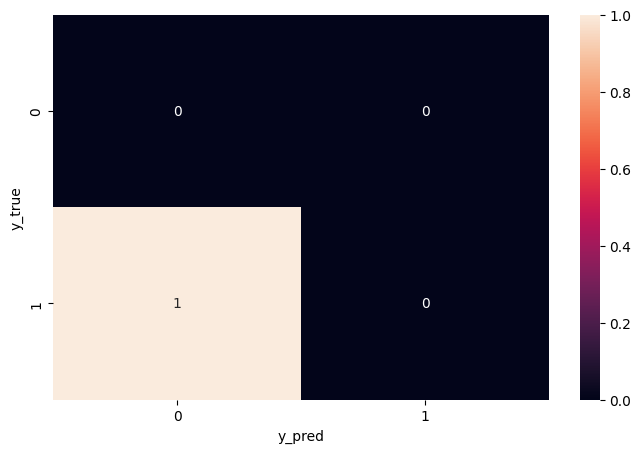

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [26]:
# Hiểm thị 5 dòng dữ liệu đầu tiên
y_pred = (y_pred > 0.5)
for i in range(min(5, len(y_pred))):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

[1.0, 0.0] => 0 (expected 1)


In [27]:
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


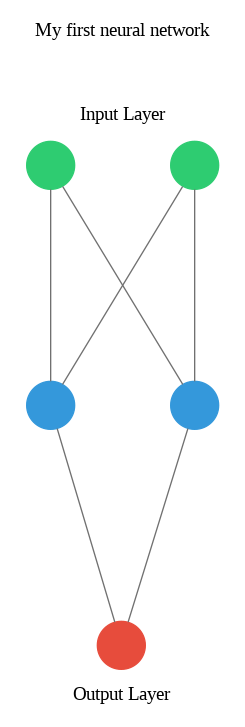

In [28]:
from ann_visualizer.visualize import ann_viz;
import pydot
import graphviz
from IPython.display import Image

ann_viz(classifier, view=True, filename="Img_NetWork_Baitap2.gv", title="My first neural network")

# Convert .dot file to .png file
(graph,) = pydot.graph_from_dot_file('Img_NetWork_Baitap2.gv')
graph.write_png('Img_NetWork_Baitap2.png')

# Display the image in Jupyter notebook
Image(filename='Img_NetWork_Baitap2.png')